In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145118 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!ls drive

'16 lık flashın içindekiler v2'  '‎Melih Akkaya kişisinden belge'
 Akademik			  MNIST
 CNN				  projeler
 Colabbasla			  python
 colab_kullanim			  Resmi
'Colab Notebooks'		  Titanic
'Elektrik devreleri nielson'	  Uçak_elektronik_hesaplar.py
 fashion_mnist			  Udemy_DerinOgrenmeyeGiris
 FILE_iqr0hw3t2aqyg_oumesaj.PDF   variartirma
"GitHub'dan_dosya_çekme.ipynb"	  veri
 Led_icin			 "Wing's Club.xlsx"


In [0]:
import os
os.chdir("/content/drive/fashion_mnist")
!pwd

/content/drive/fashion_mnist


In [0]:
!ls

fashion.ipynb


In [0]:
!pip install -q keras

In [0]:
from keras.models import Model             #model import ediyorum
from keras.layers import Input,Dense       #layerları oluşturmak için gerekli alt yapının import edilmesi
                                           #normalde output layera da ihtiyacımız var ama
                                           # dense layerı output layer olarak da kullanabikyoruz

from keras.datasets import fashion_mnist   #kerasın datasetleri kısmında default olarak mnist data setleri bulunmakta
import matplotlib.pyplot as plt            #görselleştirme kütüphanesi hem data set hem sonuöları gözlemlemek için
import json,codecs                         #sonuçları historyleri kaydetmek için ve tekrardan yüklemek için kullanılanlar

import warnings                            #gerekisiz uyarı vemesin diye
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
(x_train,_),(x_test,_)=fashion_mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train=x_train.astype("float32")/255.0     #type ını değiştiriyoruz şu an uint8.Biz 32 bit ile represent yani
x_test=x_test.astype("float32")/255.0     #temsil ediyoruz /255.0 diyerek de normalize ediyoruz

In [0]:
x_train=x_train.reshape((len(x_train),x_train.shape[1:][0]*x_train.shape[1:][1]))  #boyutları 28*28 olan verileri tek bir vektör haline getirilmesi
"""#################################aslında burda yine 60000 tane 28*28 görünyü diye belirttik bişey değiştirmedik ki???"""
x_test=x_test.reshape((len(x_test),x_test.shape[1:][0]*x_test.shape[1:][1]))

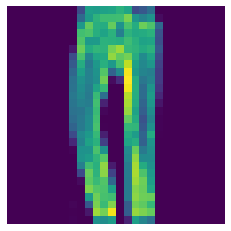

In [0]:
plt.imshow(x_train[1500].reshape(28,28)) #keras için bir önceki iki satırda uygun boyutlara getirmiştik görüntüleri ancak
                                         #matplotlib reisin canı görüntülerin ilk hali gibi olsun istiyor o da haklı
plt.axis("off")# eksenleri kapatmak için
plt.show()


In [0]:
input_img=Input(shape=(784,))#input layer hazır

encoded=Dense(32,activation="relu")(input_img)#ilk encoder leyarı ilk hidden layerı oluşturcaz
                                         #sondaki parantezin içine bie önceki katmanı yazarak nöronları birbirine bağlıyoruz
encoded=Dense(16,activation="relu")(encoded)

decoded=Dense(32,activation="relu")(encoded)

decoded=Dense(784,activation="sigmoid")(decoded)#outputta genelde sigmoid kullanılıyor

autoencoder=Model(input_img,decoded) #inputttan başlıuo decodede kadar gidiyo dedik


autoencoder.compile(optimizer='rmsprop',loss="binary_crossentropy")#hiperparametreler






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
hist=autoencoder.fit(x_train,
                     x_train,
                     epochs=200,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_train,x_train))
           #sonradan sonuçları incelemek için historye eşitlenmesi
           #fitin içerisine ilk başta train edeceğimiz ve test edeceğimiz dataları yazıyorduk x train y train yazıyoduk ama
           #autpencoder unsupervised learningde kullanılan bir model olduğu için benim inputum ve outputum aynı olacak




Train on 60000 samples, validate on 60000 samples
Epoch 1/200





60000/60000 [==============================] - 9s 157us/step - loss: 0.4079 - val_loss: 0.3520
Epoch 2/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.3373 - val_loss: 0.3293
Epoch 3/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.3251 - val_loss: 0.3220
Epoch 4/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.3200 - val_loss: 0.3167
Epoch 5/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.3164 - val_loss: 0.3159
Epoch 6/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3137 - val_loss: 0.3128
Epoch 7/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.3114 - val_loss: 0.3105
Epoch 8/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3093 - val_loss: 0.3091
Epoch 9/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.3073 - val_

In [0]:
autoencoder.save_weights("autoencoder_model.h5")

In [0]:
print(hist.history.keys())

dict_keys(['val_loss', 'loss'])


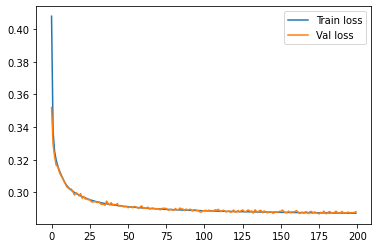

In [0]:
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()# labelların gözükmesini sağlamak
plt.show()

In [0]:
with open("autoencoder_hist.json","w") as f:
    json.dump(hist.history,f)


In [0]:
with codecs.open("autoencoder_hist.json","r",encoding="utf-8") as f:
    n=json.loads(f.read())

dict_keys(['val_loss', 'loss'])


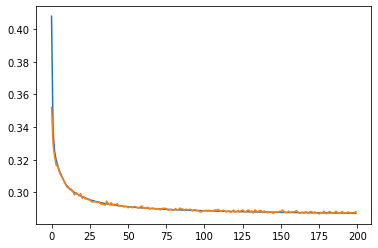

In [0]:
print(n.keys())
plt.plot(n["loss"],label="Train loss")
plt.plot(n["val_loss"],label="Val loss")
# az öncekini aynısı çıkacak sadece kaydettik sonra geri yükleyip görselleştirmek için

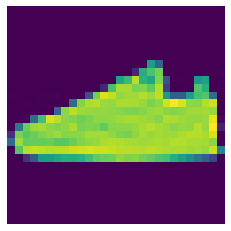

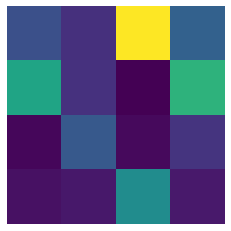

In [0]:
encoder=Model(input_img,encoded)
encoded_img=encoder.predict(x_test)

plt.imshow(x_test[93].reshape(28,28))
plt.axis("off")
plt.show()
plt.figure()
plt.imshow(encoded_img[93].reshape(4,4))
plt.axis("off")
plt.show()

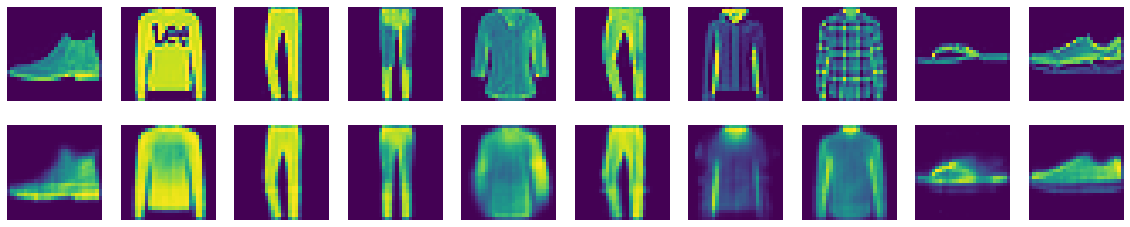

In [0]:
decoded_imgs=autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off") 

plt.show()